In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
import pickle
warnings.filterwarnings("ignore")

In [16]:
# 真の関数の定義
def true_function(x):
    return x + np.sin(3 * x) + np.cos(2 * x)


# データの生成
np.random.seed(0)
X = np.random.normal(0, 1, 200).reshape(-1, 1)
y = np.random.normal(true_function(X), 0.25).ravel()

# テストデータの生成
X_test = np.random.normal(0, 1, 100).reshape(-1, 1)
y_test = np.random.normal(true_function(X_test), 0.25).ravel()

# 真の関数のデータの生成
X_plot = np.linspace(-5, 5, 1000).reshape(-1, 1)
y_true = true_function(X_plot)


In [22]:
# ハイパーパラメータグリッドの定義
param_grid = {
    'linear': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'polynomial': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10], "coef0": [-10, -1, 0, 1, 10], 'gamma': [0.01, 0.1, 0.5, 1, 10]},
    'exponential': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 0.5, 1, 10]},
    'gaussian': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.01 ,0.1, 0.5, 1, 10]}
}
models = {"linear": None, "polynomial": None, "exponential": None, "gaussian": None}
kernels = {
    'linear': 'linear',
    'polynomial': 'poly',
    'exponential': 'laplacian',
    'gaussian': 'rbf',
}

# 各カーネルごとにグリッドサーチを行う
for kernel_name, kernel in kernels.items():
    if kernel_name == 'polynomial':
        model = KernelRidge(kernel=kernel)
        search = GridSearchCV(model, param_grid[kernel_name], cv=5, scoring='neg_mean_squared_error')
        search.fit(X, y)
        best_params = search.best_params_
        model = KernelRidge(kernel=kernel, degree=best_params['degree'], alpha=best_params['alpha'], coef0=best_params['coef0'], gamma=best_params['gamma'])
        models[kernel_name] = model
        print(f"Kernel: {kernel_name}, Parameters: {best_params}, Val RMSE: {np.sqrt(-1*search.best_score_):.3f}")
        
    elif kernel_name in ['gaussian', 'exponential']:
        model = KernelRidge(kernel=kernel)
        search = GridSearchCV(model, param_grid[kernel_name], cv=5, scoring='neg_mean_squared_error')
        search.fit(X, y)
        best_params = search.best_params_
        model = KernelRidge(kernel=kernel, gamma=best_params['gamma'], alpha=best_params['alpha'])
        models[kernel_name] = model
        print(f"Kernel: {kernel_name}, Parameters: {best_params}, Val RMSE: {np.sqrt(-1*search.best_score_):.3f}")
        
    elif kernel_name == 'linear':
        model = KernelRidge(kernel=kernel)
        search = GridSearchCV(model, param_grid[kernel_name], cv=5, scoring='neg_mean_squared_error')
        search.fit(X, y)
        best_params = search.best_params_
        model = KernelRidge(kernel=kernel, alpha=best_params['alpha'])
        models[kernel_name] = model
        print(f"Kernel: {kernel_name}, Parameters: {best_params}, Val RMSE: {np.sqrt(-1*search.best_score_):.3f}")

Kernel: linear, Parameters: {'alpha': 10}, Val RMSE: 1.042
Kernel: polynomial, Parameters: {'alpha': 0.1, 'coef0': -1, 'degree': 10, 'gamma': 0.5}, Val RMSE: 0.252
Kernel: exponential, Parameters: {'alpha': 0.001, 'gamma': 0.01}, Val RMSE: 0.265
Kernel: gaussian, Parameters: {'alpha': 0.01, 'gamma': 1}, Val RMSE: 0.240


In [27]:
# save models
with open("models.pkl", "wb") as f:
    pickle.dump(models, f)

Linear Kernel RMSE: 1.020
Polynomial Kernel RMSE: 0.595
Exponential Kernel RMSE: 0.562
Gaussian Kernel RMSE: 0.523


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


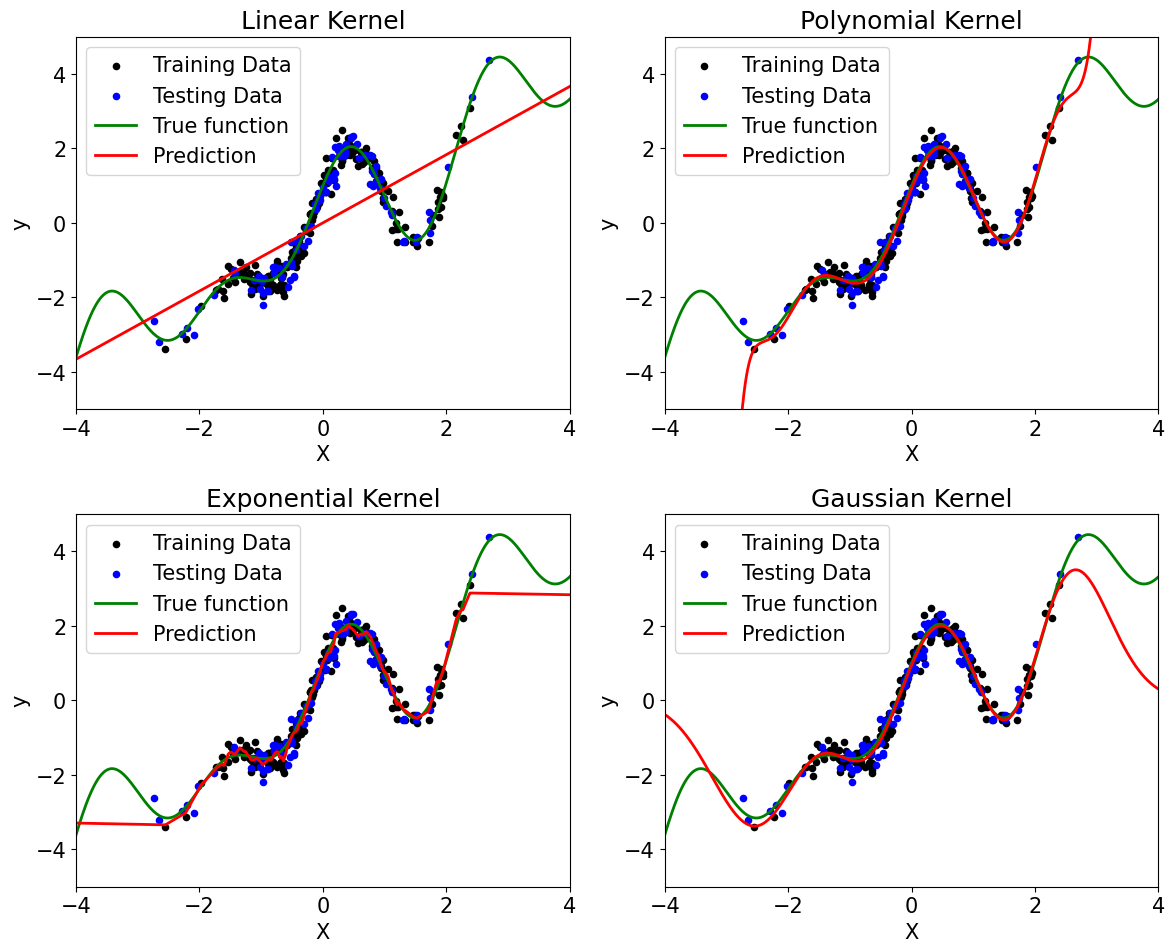

In [35]:
# 文字のサイズ大きく
plt.rcParams["font.size"] = 15
# 結果のプロット
plt.figure(figsize=(12, 14))


models = pickle.load(open("models.pkl", "rb"))
for i, (kernel_name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(X_plot)
    y_test_pred = model.predict(X_test)
    
    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'{kernel_name.capitalize()} Kernel RMSE: {np.sqrt(rmse):.3f}')
    
    # プロット
    plt.subplot(3, 2, i+1)
    plt.scatter(X, y, c='black', label='Training Data', s=20)
    plt.scatter(X_test, y_test, c='blue', label='Testing Data', s=20)
    plt.plot(X_plot, y_true, color='green', lw=2, label='True function')
    plt.plot(X_plot, y_pred, color='red', lw=2, label='Prediction')
    plt.title(f'{kernel_name.capitalize()} Kernel')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(-4, 4)
    plt.ylim(-5, 5)

plt.tight_layout()
plt.savefig("kernel_ridge_regression.eps")
plt.show()

